In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dowhy

In [27]:
raw_data = pd.read_csv('data/data.TAB', delimiter='\t')
raw_data = raw_data[(raw_data['attrition'] == 0) & (raw_data['baseusage'] == 0)]
raw_data = raw_data.drop(['reexamination', 'schid', 'givegl', 'baseusage', 'studentid', 'newcome', 'attrition', 'con', 'vou', 'fre', 'interaction'], axis=1, inplace=False).dropna()
categorical_features = ['RE2', 'hhwealth', 'seatchange', 'emtea_14', 'blackboard']
raw_data.columns

Index(['age', 'male', 'aware0', 'harmvision0', 'gansu', 'RE2', 'va18', 'zmath',
       'pedu12', 'hhwealth', 'bboarding', 'pamigrant', 'wear2', 'use2',
       'ezmath', 'major', 'edu', 'SE2', 'seatchange', 'emtea_14',
       'blackboard'],
      dtype='object')

In [3]:
raw_data = pd.get_dummies(raw_data, columns=categorical_features)
columns = [col for col in raw_data.columns if col not in ('major', 'ezmath')] + ['major', 'ezmath']
raw_data = raw_data[columns]
raw_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,10.0,1,1.0,0,0,1,0.403494,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,0.583470
1,8.0,0,1.0,1,0,0,2.023282,1.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,2.203259
2,9.0,1,1.0,0,0,1,-1.756224,0.0,1.0,0.0,...,False,True,False,False,False,False,False,True,3,-0.496389
3,11.0,0,1.0,1,0,1,-0.496389,1.0,1.0,0.0,...,False,True,False,False,False,False,False,True,3,0.763447
4,11.0,1,0.0,0,0,0,-1.216294,0.0,1.0,0.0,...,False,True,False,False,False,False,False,True,3,-0.496389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,9.0,1,0.0,1,1,0,0.883653,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,2,1.068199
3171,13.0,0,0.0,0,1,1,-1.216294,1.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,-1.036318
3172,13.0,1,0.0,0,1,0,0.699107,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,3,0.514560
3174,10.0,1,0.0,0,1,0,1.252746,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,3,0.699107


### Filtering the data
To accurately evaluate the impact of wearing glasses on math test performance, the following filtering criteria were applied:
1. **Control Group**: Retained only students who reported not wearing glasses and were confirmed to be without glasses during a random check.
2. **Treatment Group**: (Free Glasses and Voucher Groups) Retained only students who reported wearing glasses and were confirmed to be wearing them during a random check.

In [4]:
control_data = raw_data[(raw_data['major'] == 1) & (raw_data['wear2'] == 0) & (raw_data['use2'] == 0)].drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
control_data['major'] = 0
control_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,9.0,1,0.0,0,0,0,0.043541,0.0,1.0,0.0,...,False,False,False,True,False,True,False,False,0,0.403494
1,9.0,0,1.0,0,0,0,-0.676365,0.0,1.0,0.0,...,False,False,False,True,False,True,False,False,0,-0.496389
2,10.0,1,1.0,0,0,0,0.043541,0.0,1.0,0.0,...,False,False,False,True,False,True,False,False,0,-0.496389
3,11.0,1,0.0,1,0,0,-0.592717,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,0,-0.592717
4,10.0,0,0.0,1,0,0,-1.146357,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,0,-1.884542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,9.0,0,0.0,0,1,1,0.403494,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,0,0.943423
551,10.0,0,0.0,1,1,0,0.883653,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,0,1.621839
552,11.0,1,0.0,0,1,1,1.068199,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,0,0.699107
553,15.0,1,0.0,1,1,1,-0.961810,0.0,0.0,1.0,...,False,True,False,False,False,False,False,True,0,-1.146357


In [5]:
voucher_data = raw_data[(raw_data['major'] == 2) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
voucher_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
138,10.0,0,1.0,1,0,1,0.145468,1.0,1.0,0.0,...,False,True,False,False,False,False,False,True,2,-0.592717
139,10.0,1,1.0,0,0,0,-0.676365,0.0,0.0,1.0,...,False,False,False,True,False,True,False,False,2,-0.856341
140,9.0,1,1.0,0,0,1,-0.496389,0.0,0.0,0.0,...,False,False,False,True,False,True,False,False,2,-0.316412
152,11.0,0,1.0,0,0,0,0.330014,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,2,-1.515449
220,11.0,0,0.0,0,0,1,0.583470,0.0,0.0,0.0,...,False,False,False,True,False,True,False,False,2,0.403494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,9.0,1,0.0,0,1,0,0.403494,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,2,2.023282
3163,9.0,0,0.0,1,1,0,0.403494,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,2,0.583470
3164,9.0,0,0.0,1,1,0,0.763447,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,2,0.403494
3167,10.0,0,1.0,1,1,1,1.068199,1.0,0.0,0.0,...,False,True,False,False,False,False,False,True,2,1.252746


In [6]:
free_data = raw_data[(raw_data['major'] == 3) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
free_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,10.0,1,1.0,0,0,1,0.403494,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,0.583470
3,11.0,0,1.0,1,0,1,-0.496389,1.0,1.0,0.0,...,False,True,False,False,False,False,False,True,3,0.763447
10,10.0,1,0.0,1,0,1,0.514560,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,3,-0.408171
11,11.0,1,1.0,0,0,1,1.621839,0.0,1.0,0.0,...,True,False,False,False,False,False,False,True,3,1.437292
14,10.0,1,1.0,0,0,1,0.145468,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,3,-0.408171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,12.0,0,1.0,1,1,1,-0.223625,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,0.514560
3014,12.0,1,0.0,1,1,1,-0.592717,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,-0.777264
3020,11.0,1,0.0,0,1,0,0.514560,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,0.330014
3147,9.0,0,0.0,0,1,1,-0.316412,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,3,1.303376


In [7]:
treatment_data = pd.concat([voucher_data, free_data]).reset_index(drop=True).drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
treatment_data['major'] = 1
treatment_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,10.0,0,1.0,1,0,1,0.145468,1.0,1.0,0.0,...,False,True,False,False,False,False,False,True,1,-0.592717
1,10.0,1,1.0,0,0,0,-0.676365,0.0,0.0,1.0,...,False,False,False,True,False,True,False,False,1,-0.856341
2,9.0,1,1.0,0,0,1,-0.496389,0.0,0.0,0.0,...,False,False,False,True,False,True,False,False,1,-0.316412
3,11.0,0,1.0,0,0,0,0.330014,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,1,-1.515449
4,11.0,0,0.0,0,0,1,0.583470,0.0,0.0,0.0,...,False,False,False,True,False,True,False,False,1,0.403494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,12.0,0,1.0,1,1,1,-0.223625,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,0.514560
478,12.0,1,0.0,1,1,1,-0.592717,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,-0.777264
479,11.0,1,0.0,0,1,0,0.514560,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,0.330014
480,9.0,0,0.0,0,1,1,-0.316412,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,1.303376


In [8]:
data = pd.concat([control_data, treatment_data]).reset_index(drop=True)
data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,9.0,1,0.0,0,0,0,0.043541,0.0,1.0,0.0,...,False,False,False,True,False,True,False,False,0,0.403494
1,9.0,0,1.0,0,0,0,-0.676365,0.0,1.0,0.0,...,False,False,False,True,False,True,False,False,0,-0.496389
2,10.0,1,1.0,0,0,0,0.043541,0.0,1.0,0.0,...,False,False,False,True,False,True,False,False,0,-0.496389
3,11.0,1,0.0,1,0,0,-0.592717,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,0,-0.592717
4,10.0,0,0.0,1,0,0,-1.146357,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,0,-1.884542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,12.0,0,1.0,1,1,1,-0.223625,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,0.514560
1033,12.0,1,0.0,1,1,1,-0.592717,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,-0.777264
1034,11.0,1,0.0,0,1,0,0.514560,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,0.330014
1035,9.0,0,0.0,0,1,1,-0.316412,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,1,1.303376


<AxesSubplot:>

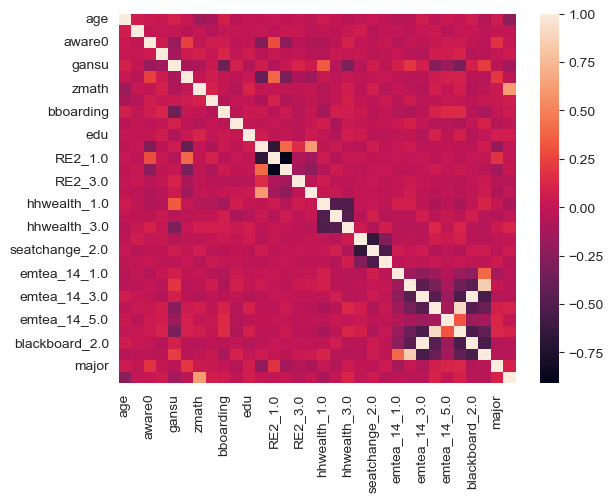

In [9]:
import seaborn as sns
sns.heatmap(data.corr())

### Propensity Scoring

In [10]:
# propensity scores
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = data.iloc[:, :-2], data['major']
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X, y)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

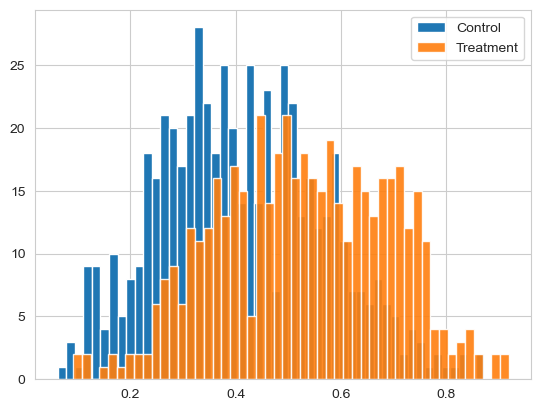

In [11]:
prop1 = [p for p, l in zip(pipe.predict_proba(X)[:, 1].tolist(), y.tolist()) if l]
prop2 = [p for p, l in zip(pipe.predict_proba(X)[:, 1].tolist(), y.tolist()) if not l]

plt.hist(prop2, bins=50, label='Control')
plt.hist(prop1, bins=50, alpha=0.9, label='Treatment')
plt.legend()
plt.show()

### ATE calculations
#### Bootstraping

In [12]:
def cosine(x, y):
    t = x.to_numpy()
    s = y.to_numpy()
    return np.dot(t, s)/(np.linalg.norm(t)*np.linalg.norm(s))

In [13]:
from sklearn.linear_model import LinearRegression

B = 100
N = 1000
T_ATE_list = []
S_ATE_list = []
Matching_ATE_list = []
IPW_ATE_list = []

for _ in range(N):
    control_data_b = control_data.sample(B)
    treatment_data_b = treatment_data.sample(B)
    data_b = pd.concat([control_data_b, treatment_data_b]).reset_index(drop=True)    
    
    # T-learner
    X_0, y_0 = control_data_b.iloc[:, :-2], control_data_b['ezmath']
    X_1, y_1 = treatment_data_b.iloc[:, :-2], treatment_data_b['ezmath']
    T_reg_model_0 = LinearRegression().fit(X_0, y_0)
    T_reg_model_1 = LinearRegression().fit(X_1, y_1)
    T_ATE_b = np.mean(T_reg_model_1.predict(X_1) - T_reg_model_0.predict(X_0))
    T_ATE_list.append(T_ATE_b)
    
    # S-learner
    X_0, y_0 = control_data_b.iloc[:, :-1], control_data_b['ezmath']
    X_1, y_1 = treatment_data_b.iloc[:, :-1], treatment_data_b['ezmath']
    X, y = data_b.iloc[:, :-1], data_b['ezmath']
    S_reg_model = LinearRegression().fit(X, y)
    S_ATE_b = np.mean(S_reg_model.predict(X_1) - S_reg_model.predict(X_0))
    S_ATE_list.append(S_ATE_b)
    
    
    # 1-NN matching
    ite = 0
    idx_to_sample_not_treated = [(i, sample) for i, sample in control_data_b.iterrows()]
    for j, x in treatment_data_b.iterrows():
        nearest_idx = sorted([(cosine(x, sample), i) for i, sample in idx_to_sample_not_treated])[-1][1]
        ite += y_1[j] - y_0[nearest_idx]
    idx_to_sample_treated = [(i, sample) for i, sample in treatment_data_b.iterrows()]
    for j, x in control_data_b.iterrows():
        nearest_idx = sorted([(cosine(x, sample), i) for i, sample in idx_to_sample_treated])[-1][1]
        ite += y_1[nearest_idx] - y_0[j]
    Matching_ATE_b = ite / (2*B)
    Matching_ATE_list.append(Matching_ATE_b)
    
    
    # IPW
    X, y = data_b.iloc[:, :-2], data_b['major']
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(X, y)
    e = pipe.predict_proba(X)[:, 1]
    IPW_ATE_b = np.sum(data_b['major']*data_b['ezmath']/e - ((1-data_b['major'])*data_b['ezmath']/(1-e)))/(2*B)
    IPW_ATE_list.append(IPW_ATE_b)

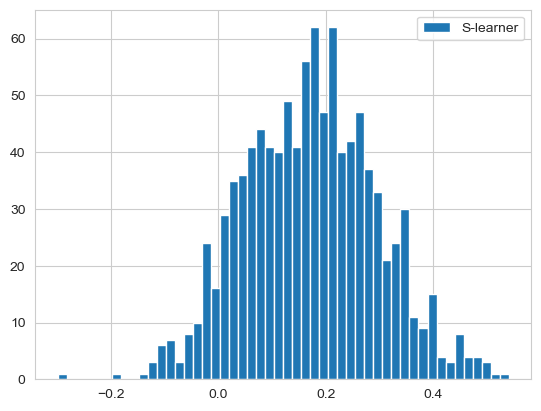

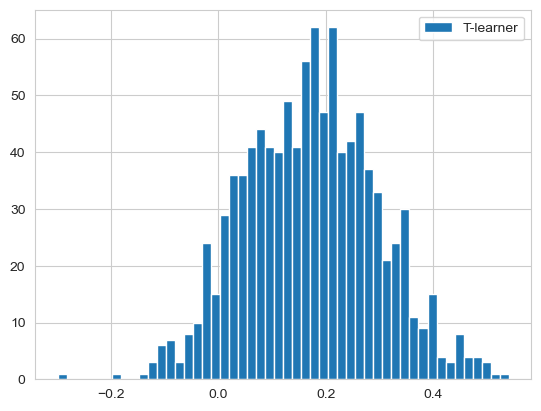

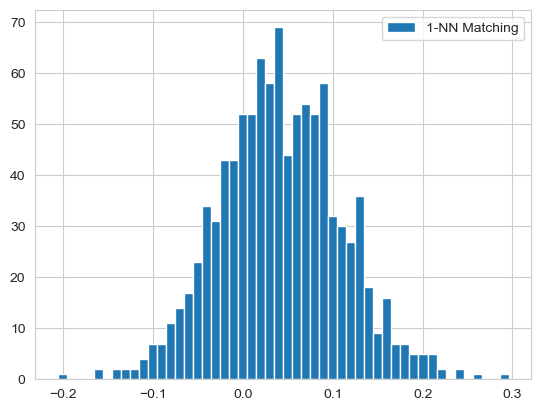

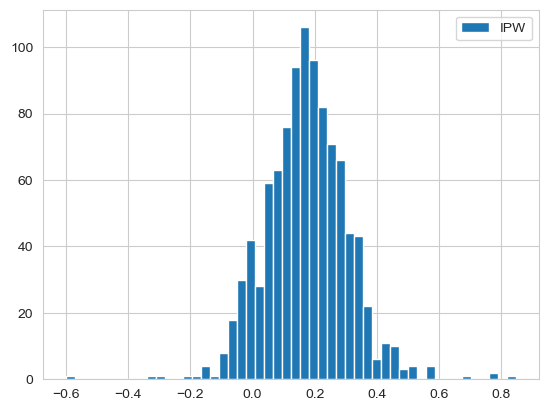

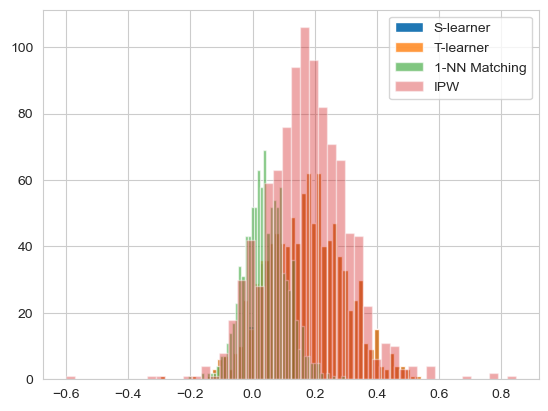

In [14]:
plt.hist(S_ATE_list, bins=50, label='S-learner')
plt.legend()
plt.show()
plt.hist(T_ATE_list, bins=50, label='T-learner')
plt.legend()
plt.show()
plt.hist(Matching_ATE_list, bins=50, label='1-NN Matching')
plt.legend()
plt.show()
plt.hist(IPW_ATE_list, bins=50, label='IPW')
plt.legend()
plt.show()

plt.hist(S_ATE_list, bins=50, label='S-learner')
plt.hist(T_ATE_list, bins=50, alpha=0.8, label='T-learner')
plt.hist(Matching_ATE_list, bins=50, alpha=0.6, label='1-NN Matching')
plt.hist(IPW_ATE_list, bins=50, alpha=0.4, label='IPW')
plt.legend()
plt.show()

In [15]:
approaches = [S_ATE_list, T_ATE_list, Matching_ATE_list, IPW_ATE_list]
for a in approaches:
    a = sorted(a)
    mean = sum(a)/len(a)
    std = np.std(np.array(a))
    CI = (a[25], a[975])
    print('*'*50)
    print(mean)
    print(std)
    print(CI)

**************************************************
0.17173782139847163
0.12274802233649011
(-0.05385280136000028, 0.41557751608000165)
**************************************************
0.17176487343813995
0.12270316551867355
(-0.05385280136000083, 0.4155775160800003)
**************************************************
0.041552130105389995
0.06790114942604279
(-0.0902649075050001, 0.18106114028000017)
**************************************************
0.1729280714677824
0.13264573618363731
(-0.06277481173719479, 0.44247703518991527)


<AxesSubplot:>

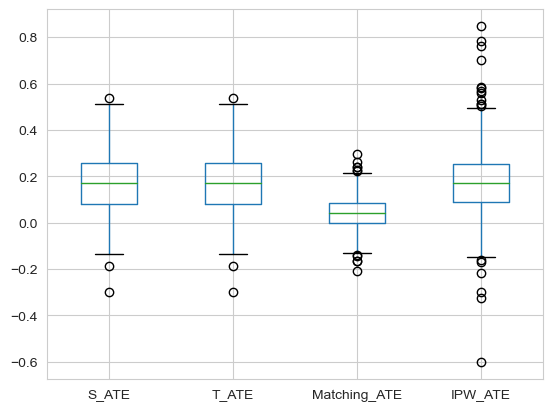

In [16]:
res = pd.DataFrame({'S_ATE': S_ATE_list,
                   'T_ATE': T_ATE_list,
                   'Matching_ATE': Matching_ATE_list,
                   'IPW_ATE': IPW_ATE_list})
res.boxplot()

### PGM approach

In [17]:
raw_data = pd.read_csv('data and supplements/dataverse_files/Eyeglasses_China.TAB', delimiter='\t')
raw_data = raw_data[(raw_data['attrition'] == 0) & (raw_data['baseusage'] == 0)]
raw_data = raw_data.drop(['SE2', 'reexamination', 'schid', 'givegl', 'baseusage', 'studentid', 'newcome', 'attrition', 'con', 'vou', 'fre', 'interaction'], axis=1, inplace=False).dropna()
categorical_features = ['RE2', 'hhwealth', 'seatchange', 'emtea_14', 'blackboard']
for f in categorical_features:
    raw_data[f] = raw_data[f].astype(str)

control_data = raw_data[(raw_data['major'] == 1) & (raw_data['wear2'] == 0) & (raw_data['use2'] == 0)].drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
control_data['major'] = 0
voucher_data = raw_data[(raw_data['major'] == 2) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
free_data = raw_data[(raw_data['major'] == 3) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
treatment_data = pd.concat([voucher_data, free_data]).reset_index(drop=True).drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
treatment_data['major'] = 1
data = pd.concat([control_data, treatment_data]).reset_index(drop=True)

data

,age,male,aware0,harmvision0,gansu,RE2,va18,zmath,pedu12,hhwealth,bboarding,pamigrant,ezmath,major,edu,seatchange,emtea_14,blackboard
0,9.0,1,0.0,0,0,2.0,0,0.043541,0.0,2.0,1.0,0.0,0.403494,0,0,2.0,4.0,1.0
1,9.0,0,1.0,0,0,2.0,0,-0.676365,0.0,2.0,1.0,0.0,-0.496389,0,0,1.0,4.0,1.0
2,10.0,1,1.0,0,0,1.0,0,0.043541,0.0,3.0,1.0,0.0,-0.496389,0,0,2.0,4.0,1.0
3,11.0,1,0.0,1,0,2.0,0,-0.592717,0.0,1.0,1.0,0.0,-0.592717,0,0,2.0,3.0,2.0
4,10.0,0,0.0,1,0,2.0,0,-1.146357,0.0,2.0,0.0,0.0,-1.884542,0,0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,12.0,0,1.0,1,1,2.0,1,-0.223625,0.0,2.0,0.0,0.0,0.514560,1,1,2.0,2.0,3.0
1033,12.0,1,0.0,1,1,2.0,1,-0.592717,0.0,1.0,0.0,0.0,-0.777264,1,1,2.0,2.0,3.0
1034,11.0,1,0.0,0,1,2.0,0,0.514560,0.0,1.0,0.0,0.0,0.330014,1,1,2.0,2.0,3.0
1035,9.0,0,0.0,0,1,2.0,1,-0.316412,0.0,1.0,0.0,0.0,1.303376,1,1,2.0,2.0,3.0


In [18]:
data.columns

Index(['age', 'male', 'aware0', 'harmvision0', 'gansu', 'RE2', 'va18', 'zmath',
       'pedu12', 'hhwealth', 'bboarding', 'pamigrant', 'ezmath', 'major',
       'edu', 'seatchange', 'emtea_14', 'blackboard'],
      dtype='object')

In [19]:
# Creating the causal graph
causal_graph = """
digraph {
aware0;
harmvision0;
gansu;
RE2;
va18;
zmath;
pedu12;
hhwealth;
bboarding;
pamigrant;
ezmath;
major;
edu;
seatchange;
emtea_14;
blackboard;
aware0 -> seatchange;
harmvision0 -> major;
gansu -> hhwealth;
gansu -> pamigrant;
gansu -> pedu12;
pedu12 -> aware0;
pedu12 -> harmvision0;
pedu12 -> pamigrant;
pedu12 -> hhwealth;
pedu12 -> zmath;
pedu12 -> ezmath;
hhwealth -> bboarding;
hhwealth -> zmath;
hhwealth -> ezmath;
pamigrant -> bboarding;
pamigrant -> aware0;
pamigrant -> hhwealth;
pamigrant -> zmath;
pamigrant -> ezmath;
edu -> major;
emtea_14 -> zmath;
emtea_14 -> ezmath;
zmath -> ezmath;
blackboard -> zmath;
blackboard -> ezmath;
major -> ezmath;
major -> seatchange;
RE2 -> ezmath;
RE2 -> major;
RE2 -> va18;
va18 -> seatchange;
}
""".replace("\n", " ")

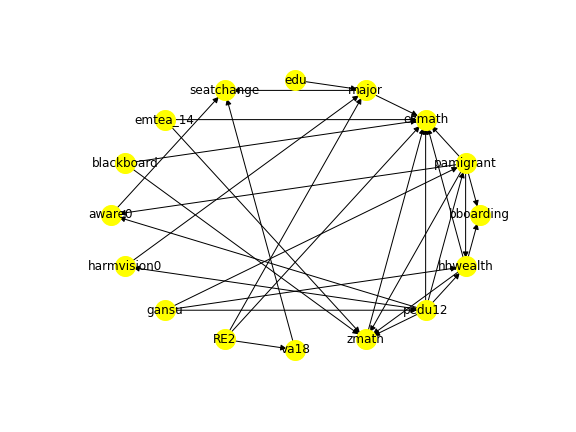

In [20]:
from dowhy import CausalModel
from IPython.display import Image, display

model= CausalModel(
        data = data,
        graph=causal_graph,
        treatment='major',
        outcome='ezmath')

display(Image(filename="causal_model.png"))

In [21]:
# Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                          
────────(E[ezmath|pedu12,RE2])
d[major]                      
Estimand assumption 1, Unconfoundedness: If U→{major} and U→ezmath then P(ezmath|major,pedu12,RE2,U) = P(ezmath|major,pedu12,RE2)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                -1⎤
 ⎢  d            ⎛  d            ⎞  ⎥
E⎢──────(ezmath)⋅⎜──────([major])⎟  ⎥
 ⎣d[edu]         ⎝d[edu]         ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→ezmath then ¬(U →→{edu})
Estimand assumption 2, Exclusion: If we remove {edu}→{major}, then ¬({edu}→ezmath)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


In [22]:
# Causal Effect Estimation
estimate = model.estimate_effect(estimands, method_name="backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                          
────────(E[ezmath|pedu12,RE2])
d[major]                      
Estimand assumption 1, Unconfoundedness: If U→{major} and U→ezmath then P(ezmath|major,pedu12,RE2,U) = P(ezmath|major,pedu12,RE2)

## Realized estimand
b: ezmath~major+pedu12+RE2
Target units: ate

## Estimate
Mean value: 0.1893867424212987


In [23]:
estimate.get_confidence_intervals(confidence_level=0.95)

In [24]:
refutel = model.refute_estimate(estimands, estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:0.1893867424212987
New effect:0.18938674242129866
p value:1.0


In [25]:
refutel = model.refute_estimate(estimands, estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:0.1893867424212987
New effect:0.1898574678946407
p value:0.96
